# Постановка задачи

Необходимо предсказывать отток (Attrition_Flag) пользователей кредитных карт на основе [данных](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers).

Попробуйте использовать перебор моделей adaboost и gradient boosting. Учтите дисбаланс классов.

# Описание набора данных

Представленный в данной рабочей тетради набор данных содержит информацию о клиентах банка. Бизнес-менеджер портфеля потребительских кредитных карт сталкивается с проблемой оттока клиентов. Необходимо проанализировать данные, чтобы выяснить причину этого, и использовать их для прогнозирования клиентов, которые могут уйти.

Описание признаков набора данных в таблице ниже:

Наименование признака | Описание
:--- | :---
*CLIENTNUM* | Уникальный идентификатор клиента
*Attrition_Flag* | Статус счета клиента (Attrited Customer - если счет закрыт, Existing Customer - если открыт)
*Customer_Age* | Возраст клиента
*Gender* | Пол клиента (M - мужчина, F - женщина)
*Dependent_count* | Количество человек, которые находятся на содержании у клиента
*Education_Level* | Уровень образования клиента
*Marital_Status* | Семейное положение клиента (Married, Single, Divorced, Unknown)
*Income_Category* | Годовой доход клиента (диапазон)
*Card_Category* | Категория карты клиента (Blue, Silver, Gold, Platinum)
*Months_on_book* | Период обслуживания в банке
*Total_Relationship_Count* | Общее количество продуктов банка, которыми пользуется (пользовался) клиент
*Months_Inactive_12_mon* | Количество месяцев бездействия за последний год
Contacts_Count_12_mon | Количество обращений за последние 12 месяцев
*Credit_Limit* | Лимит по кредитной карте
*Total_Revolving_Bal* | Возобновляемый остаток по кредитной карте
*Avg_Open_To_Buy* | Доступная для трат кредитная линия (среднее значение за 12 месяцев)
*Total_Amt_Chng_Q4_Q1* | Изменение суммы транзакции (4 квартал относительно 1 квартала)
*Total_Trans_Amt* | Общая сумма транзакций (за последние 12 месяцев)
*Total_Trans_Ct* | Общее количество транзакций (за последние 12 месяцев)
*Total_Ct_Chng_Q4_Q1* | Изменение количества транзакций (4 квартал по сравнению с 1 кварталом)
*Avg_Utilization_Ratio* | Средний коэффициент использования карты

# Импорт, первичное исследование данных

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/BankChurners.csv')

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
# в источнике данных дана рекомендация игнорировать 2 последних столбца
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
        axis=1)

In [ ]:
# обзор датафрейма (тип данных, пропуски, дубликаты)
def df_review(dataframe, head=5):
    print(dataframe.info())
    print()
    print('||||'*15)
    print()
    print(dataframe.describe())
    print()
    print('||||'*15)
    print()
    print(f'DataFrame Null values: {dataframe.isnull().values.any()}')
    print()
    print('||||'*15)
    print()
    show_duplicates = dataframe.drop_duplicates()
    print(f'DataFrame duplicates: {dataframe.shape[0] - show_duplicates.shape[0]}')
    print()
    print('||||'*15)


In [ ]:
df_review(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Пропуски и дубликаты отсутствуют

In [ ]:
categorical = df.select_dtypes(include=np.object) # категориальные признаки
numeric = df.select_dtypes(exclude=np.object) # числовые признаки

Визуализируем категориальные признаки

In [ ]:
def bar_plot(col):

    vars = df[col]
    varsValue = vars.value_counts()

    plt.figure(figsize = (9,3))
    plt.bar(varsValue.index, varsValue)
    plt.xticks(varsValue.index, varsValue.index.values)
    plt.ylabel("Количество")
    plt.title(col)
    plt.show()
    print("{}:\n{}".format(col,varsValue))

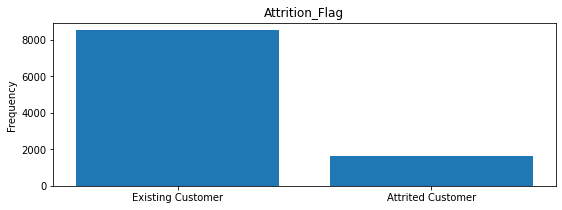

Attrition_Flag:
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


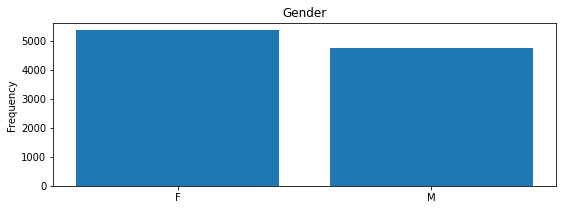

Gender:
F    5358
M    4769
Name: Gender, dtype: int64


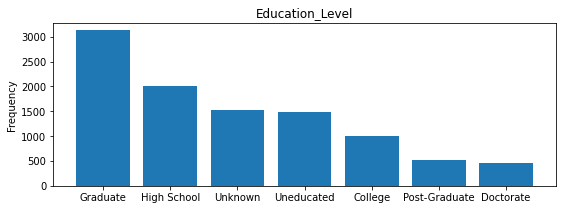

Education_Level:
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64


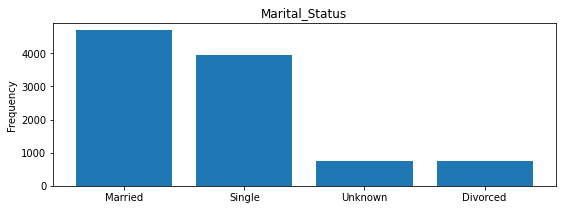

Marital_Status:
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64


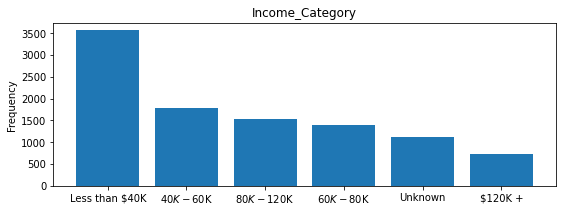

Income_Category:
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64


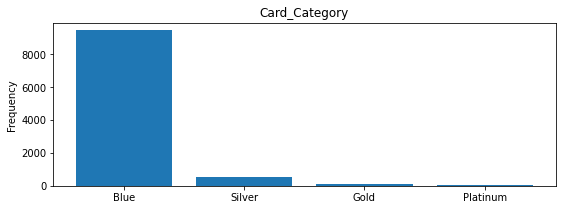

Card_Category:
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


In [ ]:
for c in categorical:
    bar_plot(c)

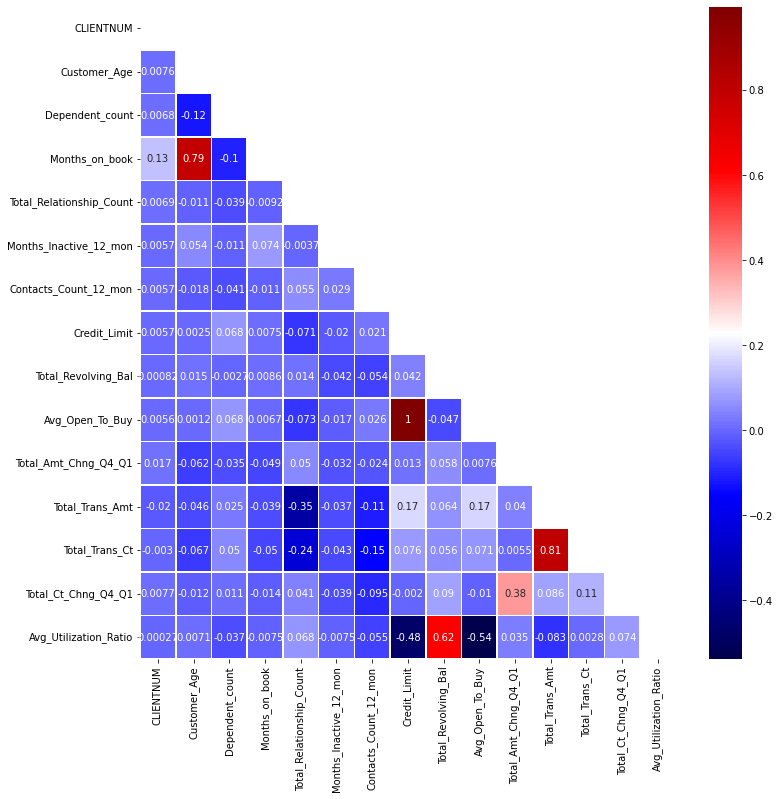

In [ ]:
plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,
            mask=np.triu(df.corr()), cmap="seismic")

In [ ]:
# смотрим как влияет коэф-т использования карты на решение отказаться от неё
col = ['Attrition_Flag', 'Avg_Utilization_Ratio']
print(df[col][df.Attrition_Flag == 'Attrited Customer'].value_counts())
print()
print()
print(df[col][df.Attrition_Flag == 'Attrited Customer'].shape[0],\
      'клиентов закрыли счет, из них',\
      df[col][df.Attrition_Flag == 'Attrited Customer'].value_counts()[0],\
      'клиента не использовали карту за последние 12 месяцев от слова совсем')

Attrition_Flag     Avg_Utilization_Ratio
Attrited Customer  0.000                    893
                   0.073                     11
                   0.112                      5
                   0.318                      5
                   0.039                      4
                                           ... 
                   0.404                      1
                   0.402                      1
                   0.400                      1
                   0.078                      1
                   0.999                      1
Length: 490, dtype: int64


1627 клиентов закрыли счет, из них 893 клиента не использовали карту за последние 12 месяцев от слова совсем


Можно визуализировать это

In [ ]:
ratio = []
value_for_cur_ratio = []

for i in np.concatenate((np.linspace(0, 0.1, 5), np.linspace(0.15, 0.99, 15))):
    ratio.append(i)
    new_value = ((df[col][df.Attrition_Flag == 'Attrited Customer']).Avg_Utilization_Ratio < i).value_counts()[0]
    value_for_cur_ratio.append(new_value)

Text(0.5, 1.0, 'Взаимосвязь оттока клиентов и коэффициента использования карты')

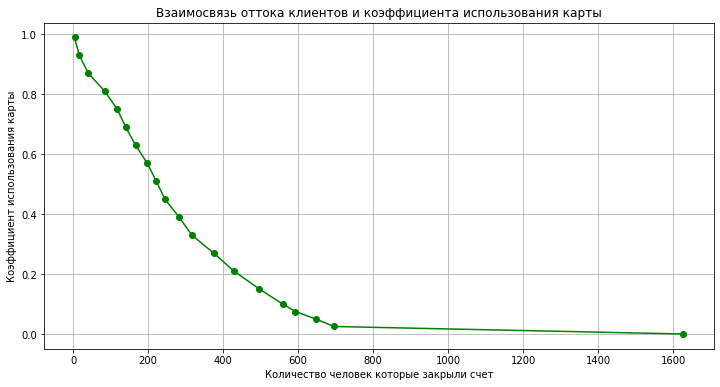

In [ ]:
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(value_for_cur_ratio, ratio, 'go-')
plt.ylabel('Коэффициент использования карты')
plt.xlabel('Количество человек которые закрыли счет')
plt.title('Взаимосвязь оттока клиентов и коэффициента использования карты')

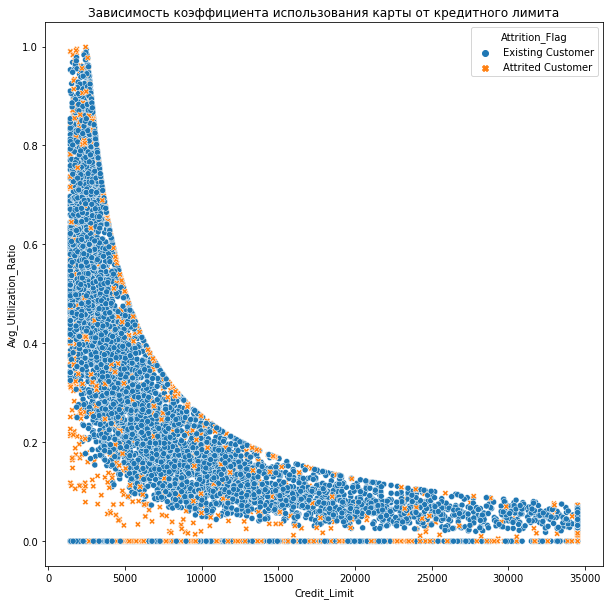

In [ ]:
plt.subplots(figsize=(10,10))
plt.title('Зависимость коэффициента использования карты от кредитного лимита')
sns.scatterplot(data=df,
                # x='Avg_Utilization_Ratio',
                # y='Credit_Limit',
                x='Credit_Limit',
                y='Avg_Utilization_Ratio',
                hue='Attrition_Flag',
                style='Attrition_Flag')

Из графика видно что с возрастанием кредитного лимита снижается коэффициент использования карты

#Кодирование категориальных признаков

Для кодирования категориальных признаков будем осуществлять замену значения признака на 0 или 1, если признак содержит только лишь 2 класса, в другом случае будем использовать OneHotEncoder.

In [ ]:
# создаем два списка, в которые запишем наименование признаков для каждого из методов кодирования
binary_encoding = []
one_hot_encoding = []

# теперь нужно найти нужные для каждого метода признаки путем отбора уникальных значений
# если у признака ровно 2 уникальных значения - добавляем признак в список binary_encoding
# иначе добавляем в список one_hot_encoding

for i in categorical: # само собой ведем отбор только среди категориальных колонок
    unique_value = df[i].unique() # берем уникальные значения в текущей колонке
    if len(unique_value) == 2:
        binary_encoding.append(i) # пополняем список, если уникальных значений ровно 2
        print(f'Признак \'{i}\' содержит следующие уникальные значения: {unique_value}')
        print('-----'*3)
    else:
        one_hot_encoding.append(i) # пополняем, если != 2
        print(f'Признак \'{i}\' содержит следующие уникальные значения: {unique_value}')
        print('-----'*3)
print('\n')
print(f'binary_encoding: {binary_encoding}')
print()
print(f'one_hot_encoding: {one_hot_encoding}')

Признак 'Attrition_Flag' содержит следующие уникальные значения: ['Existing Customer' 'Attrited Customer']
---------------
Признак 'Gender' содержит следующие уникальные значения: ['M' 'F']
---------------
Признак 'Education_Level' содержит следующие уникальные значения: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
---------------
Признак 'Marital_Status' содержит следующие уникальные значения: ['Married' 'Single' 'Unknown' 'Divorced']
---------------
Признак 'Income_Category' содержит следующие уникальные значения: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
---------------
Признак 'Card_Category' содержит следующие уникальные значения: ['Blue' 'Gold' 'Silver' 'Platinum']
---------------


binary_encoding: ['Attrition_Flag', 'Gender']

one_hot_encoding: ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


Получили два категориальных признака ['Attrition_Flag', 'Gender'] у которых значения можно заменить на 0 и 1

In [ ]:
for value in binary_encoding: # перебор признаков в списке признаков для бинарного кодирования
    unique_value = df[value].unique() # определение уникальных значений признака
    df[value] = df[value].map({unique_value[0]: 0,
                               unique_value[1]: 1}) # замена эл-та с индексом 0 на int(0)
                                                    # элемента с индексом 1 на int(1)

In [ ]:
binary_encoding_result = df[['Attrition_Flag', 'Gender']]

In [ ]:
# инициализация
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df[one_hot_encoding])
# кодирование
codes = encoder.transform(df[one_hot_encoding]).toarray()
feature_names = encoder.get_feature_names(df[one_hot_encoding].columns)

# конкатенация всех полученных данных в один датафрейм
encoded_data = pd.concat([binary_encoding_result, numeric,
                         pd.DataFrame(codes, columns=feature_names)], axis=1)

In [ ]:
encoded_data.drop('CLIENTNUM', axis=1, inplace=True) # идентификатор клиента не имеет значения для задачи
encoded_data

,Attrition_Flag,Gender,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,1,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,0,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10123,1,0,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10124,1,1,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10125,1,0,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Ниже смотрим на баланс классов

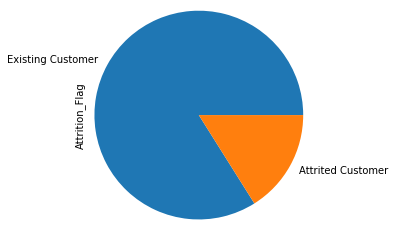

In [ ]:
encoded_data['Attrition_Flag'].value_counts().plot.pie(labels=['Existing Customer', 'Attrited Customer'],
                                                       radius=1.2, labeldistance=1.1)

In [ ]:
percent_of_attrited_customer = round((encoded_data['Attrition_Flag'].value_counts()[1] / encoded_data['Attrition_Flag'].value_counts().sum()), 2)
print(f'Процент клиентов, которые закрыли счет: {percent_of_attrited_customer * 100}%')

Процент клиентов, которые закрыли счет: 16.0%


In [ ]:
X = encoded_data.drop('Attrition_Flag', axis=1)
y = encoded_data.Attrition_Flag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

#Нормирование

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Градиентный бустинг

In [ ]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1701
           1       0.97      0.56      0.71       325

    accuracy                           0.93      2026
   macro avg       0.95      0.78      0.84      2026
weighted avg       0.93      0.93      0.92      2026



In [ ]:
gradboost_standart = precision_recall_fscore_support(y_test,
                                                     pred,
                                                     average='macro')[2]
gradboost_standart

0.8351153567822838

## Чистка набора данных от выбросов

Можно попробовать найти выбросы и удалить их из набора данных

**Межквартильный размах (МКР)** – это разница между 75% и 25% квартилем. Внутри этого диапазона лежит 50% наблюдений.

**Выбросы** – это нетипичные наблюдения. Нетипичными наблюдениями можно считать следующие значения:

*   25 перцентили минус 1.5 х МКР
*   75 перцентили плюс 1.5 х МКР



In [ ]:
# функция, которая получает на вход набор данных и признак / массив признаков
# возвращает датафрейм из выбросов, которые вычисляются исходя из определения в ячейке выше
def find_outlier(data, feature):
    for value in feature:
        Q1 = np.percentile(data[value], 25)
        Q3 = np.percentile(data[value], 75)
        IQR = Q3 - Q1
        drop_value = IQR * 1.5
        outliers = df[(df[value] < Q1 - drop_value) | (df[value] > Q3 + drop_value)]
        return outliers

In [ ]:
float_var = encoded_data.select_dtypes(include=np.float64) # найдем колонки с типом данных float64
find_outlier(encoded_data, float_var).index # получаем индексы строк с выбросами
df_without_outliers = encoded_data.drop(find_outlier(encoded_data, float_var).index, axis=0) # новый датафрейм без выбросов

In [ ]:
df_without_outliers.reset_index(inplace=True)

In [ ]:
X = df_without_outliers.drop('Attrition_Flag', axis=1)
y = df_without_outliers.Attrition_Flag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1535
           1       0.98      0.89      0.94       294

    accuracy                           0.98      1829
   macro avg       0.98      0.94      0.96      1829
weighted avg       0.98      0.98      0.98      1829



In [ ]:
gradboost_clean = precision_recall_fscore_support(y_test,
                                                     pred,
                                                     average='macro')[2]
gradboost_clean

0.9620469427280272

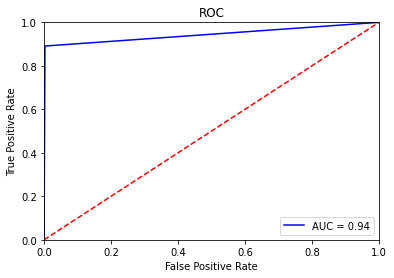

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

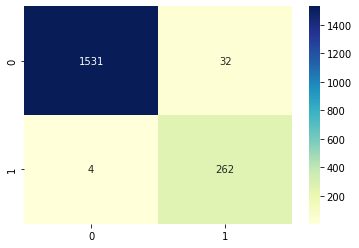

In [ ]:
sns.heatmap(confusion_matrix(pred, y_test),
            annot = True,
            fmt='',
            cmap="YlGnBu")

## Over-sampling

In [ ]:
adasyn = ADASYN()
X_train_over, y_train_over = adasyn.fit_resample(np.array(X_train), np.array(y_train))

In [ ]:
pd.Series(y_train_over).value_counts()

1    6151
0    6139
dtype: int64

In [ ]:
clf = GradientBoostingClassifier()
clf.fit(X_train_over, y_train_over)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1535
           1       0.96      0.94      0.95       294

    accuracy                           0.98      1829
   macro avg       0.97      0.97      0.97      1829
weighted avg       0.98      0.98      0.98      1829



In [ ]:
gradboost_oversampling = precision_recall_fscore_support(y_test,
                                                         pred,
                                                         average='macro')[2]
gradboost_oversampling

0.9703306470694515

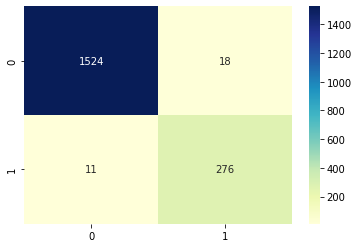

In [ ]:
sns.heatmap(confusion_matrix(pred, y_test),
            annot = True,
            fmt='',
            cmap="YlGnBu")

В результате общий прирост по метрике macro avg f1-score составил: 14.000000000000002%


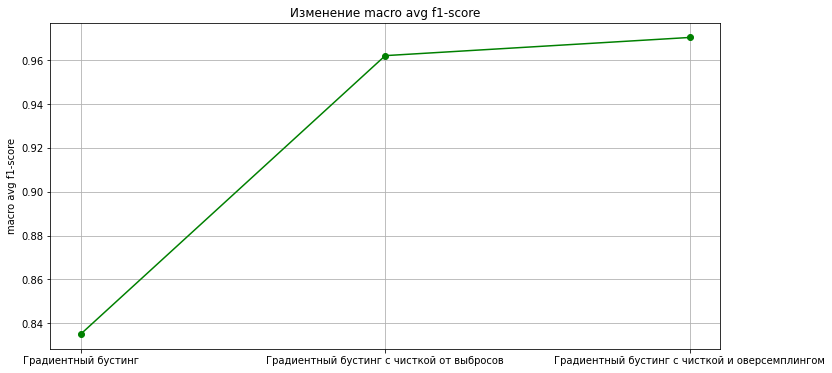

In [ ]:
score_names = ['Градиентный бустинг',
               'Градиентный бустинг с чисткой от выбросов',
               'Градиентный бустинг с чисткой и оверсемплингом']
score_values = [gradboost_standart,
                gradboost_clean,
                gradboost_oversampling]
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(score_names, score_values, 'go-')
plt.ylabel('macro avg f1-score')
plt.title('Изменение macro avg f1-score')

print(f'В результате общий прирост по метрике macro avg f1-score составил: {round((gradboost_oversampling - gradboost_standart), 2) * 100}%')

#RandomForest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_over, y_train_over)
pred = rf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1535
           1       0.96      0.88      0.92       294

    accuracy                           0.98      1829
   macro avg       0.97      0.94      0.95      1829
weighted avg       0.98      0.98      0.98      1829



#XGBClassifier и перебор параметров модели

Проблема градиентного бустинга кроется в переобучении тренировочных данных. Для того чтобы решить эту проблему можно попробовать регулировать скорость обучения модели.

Градиентный бустинг включает в себя последовательное создание и добавление в модель решающих деревьев. Новые деревья добавляются в модель для корректировки остаточных ошибок существующей структуры.
Можно задать сетку из значений скорости обучения и оценить изменение логарифмитической ошибки при обучении модели при разных значениях скорости обучения.

In [ ]:
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

Найдем лучшее значение скорости обучения при стандартном значении n_estimators = 100

In [ ]:
%%time
model = XGBClassifier()
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_over, y_train_over)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.023297 using {'learning_rate': 0.3}
CPU times: user 3.13 s, sys: 136 ms, total: 3.26 s
Wall time: 1min 50s


В ходе перебора получаем скорость обучения = 0.3, это высокая скорость обучения, вероятнее всего стандартное значение n_estimators = 100 потребуется увеличить.

-0.685492 (0.000057) при: {'learning_rate': 0.0001}
-0.622592 (0.000393) при: {'learning_rate': 0.001}
-0.301552 (0.003325) при: {'learning_rate': 0.01}
-0.049074 (0.002468) при: {'learning_rate': 0.1}
-0.028151 (0.003078) при: {'learning_rate': 0.2}
-0.023297 (0.003210) при: {'learning_rate': 0.3}
nan (nan) при: {'learning_rate': 0.4}
nan (nan) при: {'learning_rate': 0.5}
nan (nan) при: {'learning_rate': 0.6}
nan (nan) при: {'learning_rate': 0.7}
nan (nan) при: {'learning_rate': 0.8}
nan (nan) при: {'learning_rate': 0.9}
nan (nan) при: {'learning_rate': 1}


Text(0, 0.5, 'Инвертированная логарифмитическая ошибка')

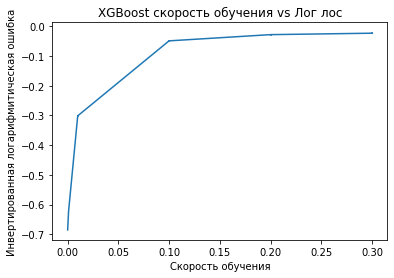

In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) при: %r" % (mean, stdev, param))

plt.errorbar(learning_rate, means, yerr=stds)
plt.title("XGBoost скорость обучения vs Лог лос")
plt.xlabel('Скорость обучения')
plt.ylabel('Инвертированная логарифмитическая ошибка')

Для снижения скорости обучения обычно требуется добавление в модель большего количества деревьев. Можно оценить взаимосвязь разных значений скорости обучения и разного количества деревьев.

Лучший результат: -0.021625 при: {'learning_rate': 0.1, 'n_estimators': 400}
-0.685492 (0.000057) при: {'learning_rate': 0.0001, 'n_estimators': 100}
-0.677978 (0.000106) при: {'learning_rate': 0.0001, 'n_estimators': 200}
-0.670609 (0.000157) при: {'learning_rate': 0.0001, 'n_estimators': 300}
-0.663375 (0.000205) при: {'learning_rate': 0.0001, 'n_estimators': 400}
-0.656277 (0.000249) при: {'learning_rate': 0.0001, 'n_estimators': 500}
-0.622592 (0.000393) при: {'learning_rate': 0.001, 'n_estimators': 100}
-0.563364 (0.000768) при: {'learning_rate': 0.001, 'n_estimators': 200}
-0.512957 (0.001393) при: {'learning_rate': 0.001, 'n_estimators': 300}
-0.469578 (0.001719) при: {'learning_rate': 0.001, 'n_estimators': 400}
-0.432033 (0.002250) при: {'learning_rate': 0.001, 'n_estimators': 500}
-0.301552 (0.003325) при: {'learning_rate': 0.01, 'n_estimators': 100}
-0.185984 (0.004068) при: {'learning_rate': 0.01, 'n_estimators': 200}
-0.137388 (0.002941) при: {'learning_rate': 0.01, 'n_est

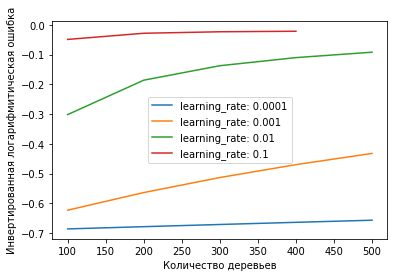

In [ ]:
%%time
model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_over, y_train_over)

print("Лучший результат: %f при: %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) при: %r" % (mean, stdev, param))

scores = np.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    plt.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
plt.legend()
plt.xlabel('Количество деревьев')
plt.ylabel('Инвертированная логарифмитическая ошибка')

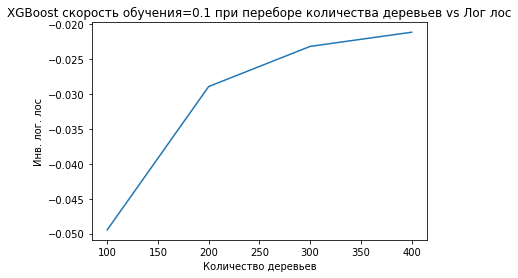

In [ ]:
n_estimators = [100, 200, 300, 400]
loss = [-0.049485, -0.028940, -0.023187, -0.021159]
plt.plot(n_estimators, loss)
plt.xlabel('Количество деревьев')
plt.ylabel('Инв. лог. лос')
plt.title('XGBoost скорость обучения=0.1 при переборе количества деревьев vs Лог лос')
plt.show()

In [ ]:
preds = grid_search.predict(X_test)

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1535
           1       0.96      0.93      0.95       294

    accuracy                           0.98      1829
   macro avg       0.97      0.96      0.97      1829
weighted avg       0.98      0.98      0.98      1829



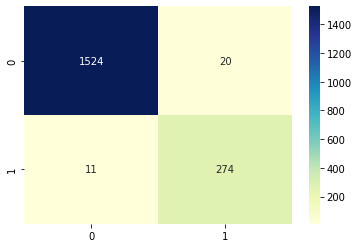

In [ ]:
sns.heatmap(confusion_matrix(preds, y_test),
            annot = True,
            fmt='',
            cmap="YlGnBu")

# Вывод

В этой рабочей тетради я изучил набор данных о клиентах банка и спрогнозировал их отток с помощью градиентного бустинга, предварительно обработав данные с использованием разных подходов, таких как: кодирование категориальных признаков, нормирование значений, аугментацию данных одного из классов. Вместе с этим я оценил работу алгоритма RandomForest и XGBClassifier, перебрав различные параметры при которых достигаются наилучшие показатели на валидационной выборке.

Лучший результат по метрике macro avg f1-score в 0.97 удалось получить при использовании XGBClasifier с параметрами {'learning_rate': 0.1, 'n_estimators': 400}

Я очень надеюсь, что это не результат переобучения модели в следствие отсеивания данных, которые были отобраны в качестве нетипичных наблюдений.